In [120]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands

In [198]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya)

In [204]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

H = H_4by4(Kxa, Kya, Delta=Delta, eps=eps, theta=theta)
dHx, dHy = dH_4by4(Kxa, Kya)

In [205]:
H.shape, dHx.shape, dHy.shape

((4, 4, 200, 200), (4, 4, 200, 200), (4, 4, 200, 200))

In [206]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Delta=Delta, eps=eps, theta=theta)

<IPython.core.display.Javascript object>


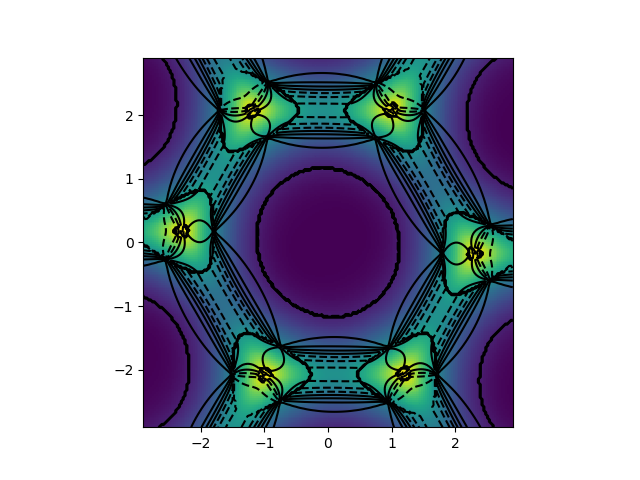

In [207]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

<IPython.core.display.Javascript object>


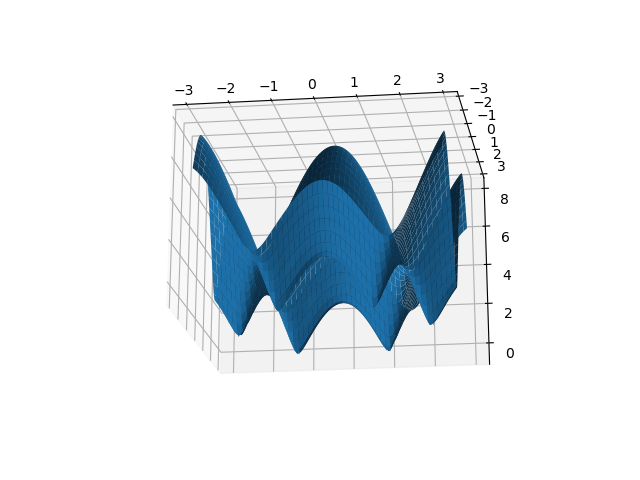

In [209]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Kxa, Kya, E[2])

# Brillouin Zone

In [16]:
from blg_strain.lattice import strain_tensor
from blg_strain.utils.const import deltans

In [17]:
%matplotlib notebook

In [18]:
strain = strain_tensor(eps, theta)
I = np.eye(2)

In [19]:
a1, a2 = deltans[2], deltans[4]  # lattice basis vectors
a1p = (I + strain).dot(a1)
a2p = (I + strain).dot(a2)

a1 = np.append(a1, 0) # make 3D
a2 = np.append(a2, 0)
a1p = np.append(a1p, 0) # make 3D
a2p = np.append(a2p, 0)

a1, a2, a1p, a2p

(array([0.8660254, 1.5      , 0.       ]),
 array([-0.8660254,  1.5      ,  0.       ]),
 array([0.85173598, 1.65      , 0.        ]),
 array([-0.85173598,  1.65      ,  0.        ]))

Reciprocal lattice vectors
$$
b_1 = 2\pi \frac{a_2\times \hat{z}}{|a_1\times a_2|}
$$
$$
b_2 = 2\pi \frac{\hat{z}\times a_1}{|a_1\times a_2|}
$$

In [25]:
b1 = 2 * np.pi * np.cross(a2, [0, 0, 1]) / np.linalg.norm(np.cross(a1, a2))
b2 = 2 * np.pi * np.cross([0, 0, 1], a1) / np.linalg.norm(np.cross(a1, a2))
b1p = 2 * np.pi * np.cross(a2p, [0, 0, 1]) / np.linalg.norm(np.cross(a1p, a2p))
b2p = 2 * np.pi * np.cross([0, 0, 1], a1p) / np.linalg.norm(np.cross(a1p, a2p))
b1, b2, b1p, b2p

(array([ 3.62759873,  2.0943951 , -0.        ]),
 array([-3.62759873,  2.0943951 ,  0.        ]),
 array([ 3.68845829,  1.90399555, -0.        ]),
 array([-3.68845829,  1.90399555,  0.        ]))

In [24]:
n = 2
mat = np.column_stack([a1p, a2p])[:n]
mat = 2 * np.pi * np.linalg.inv(mat).T
mat = np.vstack([mat, np.zeros(shape=(3 - n, n))])
[v.squeeze() for v in reversed(np.hsplit(mat, n))]

[array([-3.68845829,  1.90399555,  0.        ]),
 array([3.68845829, 1.90399555, 0.        ])]

In [131]:
vectors = [b1, b2]
vectorsp = [b1p, b2p]

In [132]:
import itertools
from scipy.spatial import Voronoi
from math import atan2

https://github.com/dean0x7d/pybinding/blob/master/pybinding/lattice.py

In [133]:
def get_bz_vertices(vectors):
    points = [sum(n * v for n, v in zip(ns, vectors))
                      for ns in itertools.product([-1, 0, 1], repeat=2)]
    vor = Voronoi([p[:2] for p in points])
    # See scipy's Voronoi documentation for details (-1 indicates infinity)
    finite_regions = [r for r in vor.regions if len(r) != 0 and -1 not in r]
    assert len(finite_regions) == 1
    return [vor.vertices[i] for i in finite_regions[0]]

In [134]:
bz = get_bz_vertices(vectors)
bzp = get_bz_vertices(vectorsp)

<IPython.core.display.Javascript object>


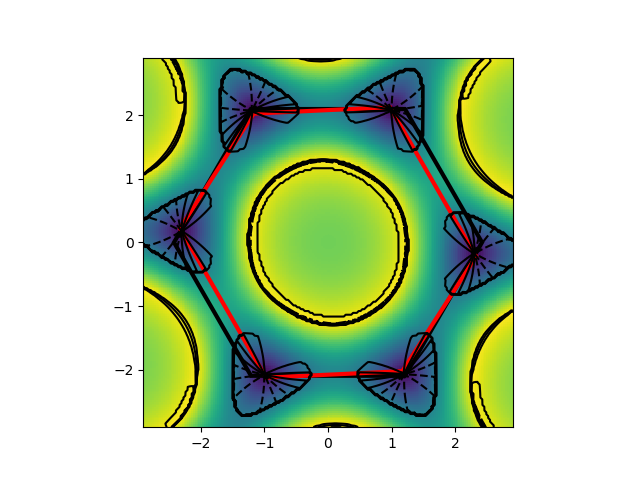

In [135]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[1])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

from matplotlib.patches import Polygon
p = Polygon(bz, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bzp, fill=False, color='r', lw=3)
ax.add_patch(p)

# ax.plot([0, b1[0]], [0, b1[1]], 'k')
# ax.plot([0, b2[0]], [0, b2[1]], 'k')

In [64]:
bz_vertices

[array([-1.20919958, -2.0943951 ]),
 array([ 1.20919958, -2.0943951 ]),
 array([2.41839915, 0.        ]),
 array([1.20919958, 2.0943951 ]),
 array([-1.20919958,  2.0943951 ]),
 array([-2.41839915,  0.        ])]

In [136]:
strain = strain_tensor(eps, theta)

In [137]:
strain

array([[0.070875  , 0.05044598],
       [0.05044598, 0.012625  ]])

## Package

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.lattice import strain_tensor
from blg_strain.lattice import brillouin_zone

In [6]:
eps = 0.1
# theta = np.pi/4
theta = np.pi/2

In [7]:
strain0 = strain_tensor(0, 0)
strain = strain_tensor(eps, theta)

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [8]:
bz

[array([1.35280444, 1.90399555]),
 array([-1.35280444,  1.90399555]),
 array([-2.33565385,  0.        ]),
 array([-1.35280444, -1.90399555]),
 array([ 1.35280444, -1.90399555]),
 array([2.33565385, 0.        ])]

In [9]:
I = np.eye(2)

# lattice basis vectors
a1 = np.array([np.sqrt(3)/2, 3/2])
a2 = np.array([-np.sqrt(3)/2, 3/2])

# strained basis vectors
a1p = (I + strain).dot(a1)
a2p = (I + strain).dot(a2)

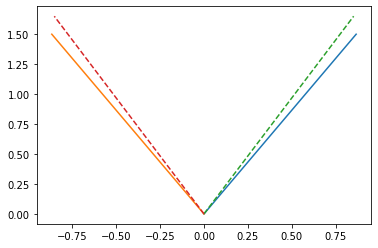

In [10]:
fig, ax = plt.subplots()
ax.plot([0, a1[0]], [0, a1[1]])
ax.plot([0, a2[0]], [0, a2[1]])

ax.plot([0, a1p[0]], [0, a1p[1]], '--')
ax.plot([0, a2p[0]], [0, a2p[1]], '--')

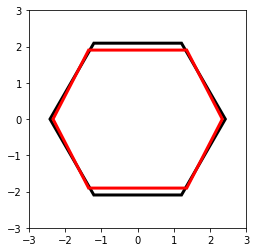

In [11]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
p = Polygon(bz0, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)

Strained BZ is still a Bravais lattice. So we can still look near the distorted K and K' points to get the result over the full BZ

## Find points closest to original K, K'

In [143]:
from blg_strain.utils.const import K

In [144]:
K1 = np.array([K, 0])
K2 = -K1
bz = np.array(bz)

dist2 = ((bz - K1) ** 2).sum(axis=1)
arg = np.argmin(dist2)
K1p = bz[arg]

dist2 = ((bz - K2) ** 2).sum(axis=1)
arg = np.argmin(dist2)
K2p = bz[arg]

In [145]:
K1, K1p, K2, K2p

(array([2.41839915, 0.        ]),
 array([ 2.32145463, -0.26083591]),
 array([-2.41839915, -0.        ]),
 array([-2.32145463,  0.26083591]))

In [146]:
from blg_strain.utils.lattice import strained_K

In [147]:
strained_K(strain, False)

array([ 2.32145463, -0.26083591])

# Playing around with strain

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from blg_strain.lattice import strain_tensor
from blg_strain.lattice import brillouin_zone

In [9]:
eps = 0.1
theta = 0
# theta = 0

In [14]:
strain0 = strain_tensor(0, 0)
strain = strain_tensor(eps, theta)
# strain = np.array([
#     [0.1, 0.2],
#     [0.2, 0.2],
# ])

bz0 = brillouin_zone(strain0)
bz = brillouin_zone(strain)

In [15]:
bz

[array([2.33647064, 0.        ]),
 array([ 0.96134638, -2.12953239]),
 array([-0.96134638, -2.12953239]),
 array([-2.33647064,  0.        ]),
 array([-0.96134638,  2.12953239]),
 array([0.96134638, 2.12953239])]

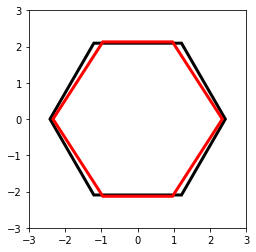

In [16]:
fig, ax = plt.subplots()

from matplotlib.patches import Polygon
p = Polygon(bz0, fill=False, color='k', lw=3)
ax.add_patch(p)

p = Polygon(bz, fill=False, color='r', lw=3)
ax.add_patch(p)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)

# Find energy minima

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.utils.lattice import strained_K, strain_tensor

In [2]:
%matplotlib notebook

In [3]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [4]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

H = H_4by4(Kxa, Kya, Delta=Delta, eps=eps, theta=theta)
dHx, dHy = dH_4by4(Kxa, Kya)

In [20]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, eps=eps, theta=theta)

In [21]:
strain = strain_tensor(eps, theta)
K1p = strained_K(strain)
K2p = strained_K(strain, True)

In [22]:
K1p

array([ 2.32531073, -0.21956524])

<IPython.core.display.Javascript object>


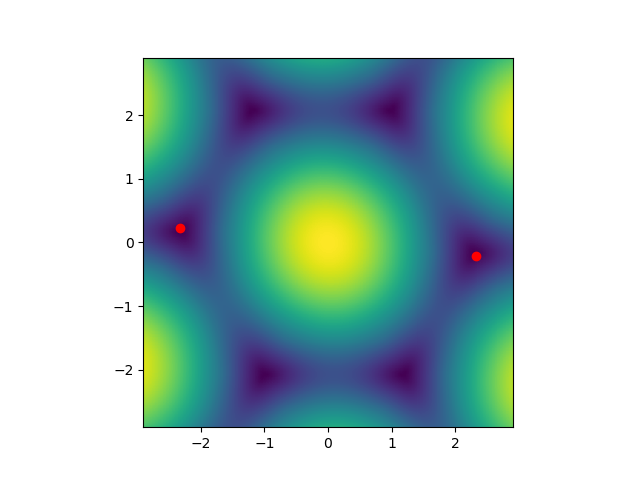

In [23]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2])
# ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)
ax.plot(*K1p, 'or')
ax.plot(*K2p, 'or')

In [24]:
from scipy.interpolate import RectBivariateSpline

In [25]:
spl = RectBivariateSpline(kxa, kya, E[2])

<IPython.core.display.Javascript object>


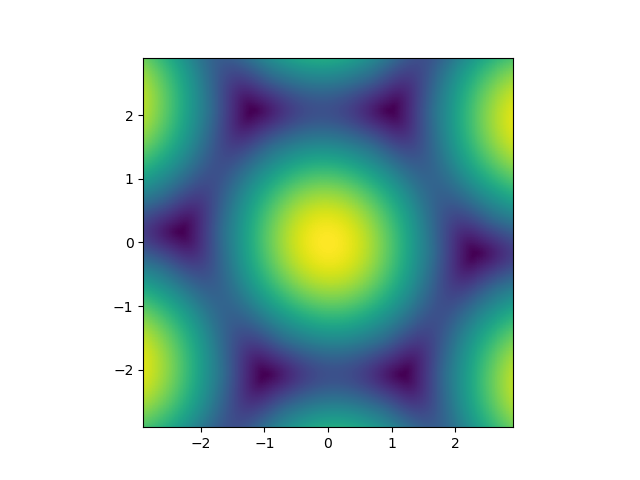

In [26]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, spl(kxa, kya))
ax.set_aspect(1)

In [27]:
from scipy.optimize import minimize

In [28]:
def f(x):
    return spl(*x)
res = minimize(f, K1p)
KD1 = res.x
res = minimize(f, K2p)
KD2 = res.x

In [29]:
E[2].min()

-0.8857292925518189

<IPython.core.display.Javascript object>


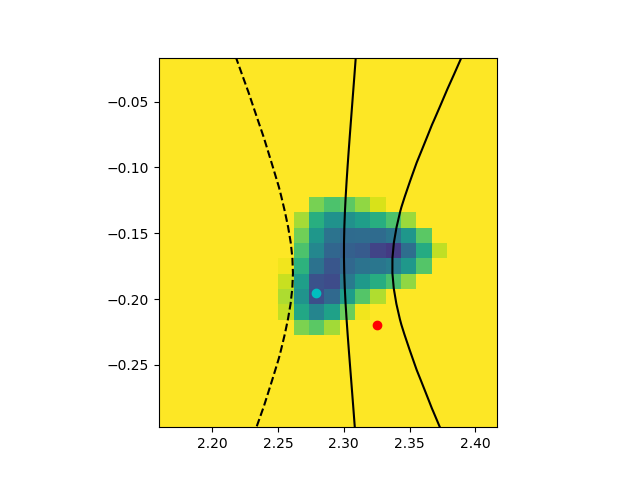

In [30]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2], vmin=-.9, vmax=-0.8)
ax.contour(Kxa, Kya, Psi[0][0].real, colors='k')
ax.set_aspect(1)
ax.plot(*K1p, 'or')
ax.plot(*K2p, 'or')

ax.plot(*KD1, 'oc')
ax.plot(*KD2, 'oc')

# Test function to turn off gammas

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.utils.lattice import strained_K, strain_tensor
from blg_strain.utils.const import set_parameters

In [32]:
%matplotlib notebook

In [33]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [100]:
Delta = 0.01
eps = 0.1,
theta=np.pi/4

In [101]:
set_parameters(['gamma3'])
# set_parameters()

In [102]:
kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, eps=eps, theta=theta)

<IPython.core.display.Javascript object>


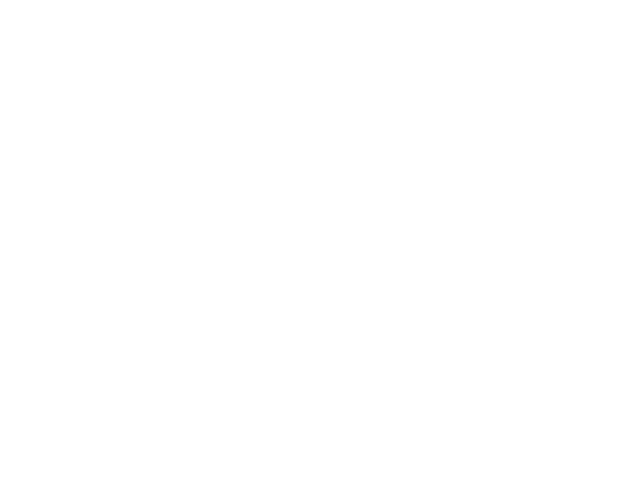

In [103]:
fig, ax = plt.subplots()
ax.pcolormesh(Kxa, Kya, E[2])
ax.contour(Kxa, Kya, Psi[1][3].real, colors='k')
ax.set_aspect(1)

# Try to determine the relationship between shift in Dirac point and strain

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from blg_strain.hamiltonian import H_4by4, dH_4by4
from blg_strain.bands import get_bands
from blg_strain.lattice import strained_K, strain_tensor


In [4]:
%matplotlib notebook

In [5]:
kxa = np.linspace(1.2*-4*np.pi/(3*np.sqrt(3)),1.2*4*np.pi/(3*np.sqrt(3)), 500)
kya = kxa
Kxa, Kya = np.meshgrid(kxa, kya, indexing='ij')

In [6]:
Delta = 0.01
eps = 0.1,
theta=np.pi/6

In [108]:
set_parameters(turn_off=['gamma3', 'gamma4', 'gamman', 'DeltaAB'])
# set_parameters()

In [109]:
from scipy.interpolate import RectBivariateSpline
from scipy.optimize import minimize

In [110]:
K1ps = []
K2ps = []

KD1s = []
KD2s = []

epss = np.linspace(0, 0.02, 10)
for eps in epss:
    kxa, kya, Kxa, Kya, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, eps=eps, theta=theta)
    spl = RectBivariateSpline(kxa, kya, E[2])
    def f(x):
        return spl(*x)
    
    strain = strain_tensor(eps, theta)
    K1ps.append(strained_K(strain))
    K2ps.append(strained_K(strain, True))
    
    res = minimize(f, K1p)
    KD1s.append(res.x)
    res = minimize(f, K2p)
    KD2s.append(res.x)
    
    

In [111]:
K1ps = np.array(K1ps)
K2ps = np.array(K2ps)
KD1s = np.array(KD1s)
KD2s = np.array(KD2s)

In [123]:
strain

array([[0.014175 , 0.0100892],
       [0.0100892, 0.002525 ]])

<IPython.core.display.Javascript object>


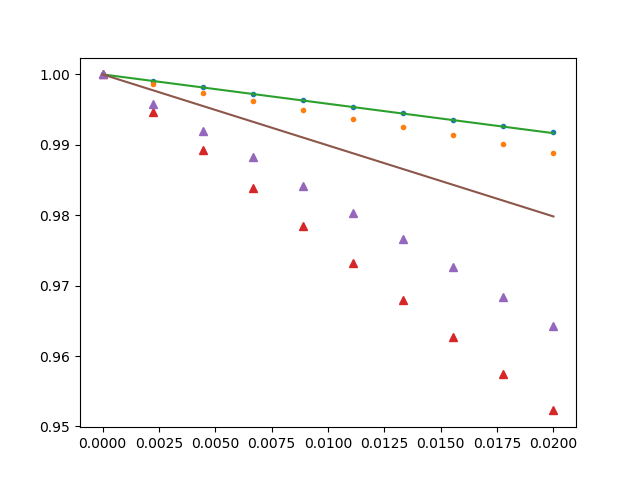

In [125]:
fig, ax = plt.subplots()
ax.plot(epss, K1ps[:,0]/K1ps[0,0], '.')
ax.plot(epss, KD1s[:,0]/K1ps[0,0], '.')
ax.plot(epss, 1-epss/2+epss*.165/2)

ax.plot(epss, K1ps[:,1]+1, '^')
ax.plot(epss, KD1s[:,1]+1, '^')
ax.plot(epss, 1-epss*(1+.165)*np.sin(2*theta))

K point of Brillouin zone transforms as
$$
\frac{\mathbf{K'}}{|\mathbf K|} = (1-\epsilon_{xx}/2-\epsilon_{yy}/2, -2\epsilon_{xy})
$$
[10.1103/PhysRevB.80.045401]

Confirmed x component, but y component is still suspicious... I think we should just keep everything numeric and exact.

In [89]:
-1.165 * eps

-0.0233

# Overhaul classes

In [3]:
from blg_strain.lattice import StrainedLattice

In [4]:
sl = StrainedLattice(eps=0.1, theta=0)

In [5]:
sl.Kp

array([-2.30536649e+00, -7.46579539e-09])

In [6]:
from blg_strain.bands import BandStructure

In [7]:
bs = BandStructure(sl)

In [8]:
bs.calculate(400,400)

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


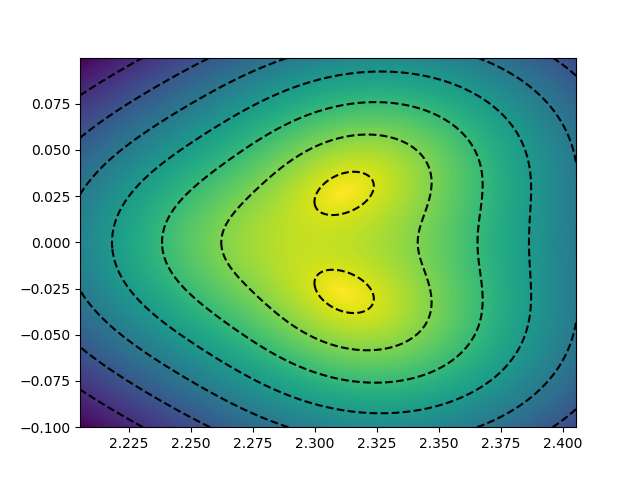

array([[-0.38563012, -0.38743264, -0.38923241, ..., -0.38923246,
        -0.38743269, -0.38563017],
       [-0.38692753, -0.38873256, -0.39053487, ..., -0.39053492,
        -0.38873262, -0.38692758],
       [-0.38822212, -0.39002967, -0.39183449, ..., -0.39183454,
        -0.39002972, -0.38822217],
       ...,
       [-0.40787424, -0.40944721, -0.41101217, ..., -0.41101221,
        -0.40944726, -0.40787428],
       [-0.40629483, -0.4078632 , -0.40942353, ..., -0.40942358,
        -0.40786325, -0.40629488],
       [-0.40471179, -0.40627557, -0.4078313 , ..., -0.40783134,
        -0.40627561, -0.40471184]])

In [10]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[1])
ax.contour(bs.K.Kxa, bs.K.Kya, bs.K.E[1], colors='k')
bs.K.E[2]

In [17]:
bs.K.E[1].max(), bs.K.E[2].min(), bs.Kp.E[1].max(), bs.Kp.E[2].min()

(-0.8738460285996275,
 -0.8721971671417162,
 -0.8738460390198989,
 -0.8721971679278993)

In [12]:
sl.gammans[0]*3 + sl.DeltaAB

0.8754700000000001

In [15]:
zero = bs.get_zero_energy()

<IPython.core.display.Javascript object>


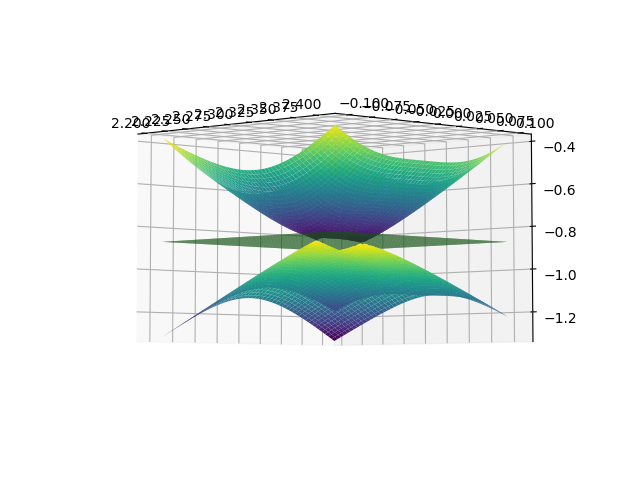

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[2], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[1], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa*zero )

# Repeat investigation of shifting Dirac points

In [1]:
import numpy as np
from blg_strain.lattice import StrainedLattice

In [2]:
sls = []

epss = np.linspace(0, 0.02, 10)
for eps in epss:
    sl = StrainedLattice(eps, theta=0)
    sls.append(sl)
    

In [3]:
K_bzs = np.array([sl.K_bz for sl in sls])
Ks = np.array([sl.K for sl in sls])

In [4]:
fig, ax = plt.subplots()
ax.plot(epss, K_bzs[:,0]/K_bzs[0,0], '.')
ax.plot(epss, Ks[:,0]/K_bzs[0,0], '.')
ax.plot(epss, 1-epss*(1-.165)*2/3)

# ax.plot(epss, K_bzs[:,1]/K_bzs[0,1], '.')
# ax.plot(epss, Ks[:,1]/K_bzs[0,1], '.')
# # ax.plot(epss, 1-epss/2+epss*.165/2)

NameError: name 'plt' is not defined

Still not 100% clear

# Class for quantities depending on $E_F$

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice

In [31]:
from blg_strain.utils.const import K, a0, muB

In [32]:
0.1/a0/1e9

0.7042253521126761

In [33]:
K/a0/1e9

17.030979945861198

In [34]:
sl = StrainedLattice(eps=0.02, theta=np.pi/2)

In [35]:
bs = BandStructure(sl, Delta=0.02)

In [36]:
bs.calculate(400,400)

In [48]:
bs.K.Omega.max(), bs.K.Mu.max()

(4.473734836633488e-16, 6.537855635289366e-23)

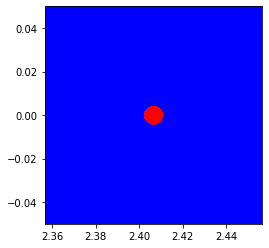

In [43]:
fig, ax = plt.subplots()
# for i in range(4):
#     ax.plot(bs.K.Kxa[:,200], bs.K.E[i][:,200])
# ax.axhline(0)
v = 200 * muB
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[2], cmap='bwr', vmin=-v, vmax=v)
ax.set_aspect(1)

In [58]:
sl.strain

array([[-3.30000000e-03,  1.42671352e-18],
       [ 1.42671352e-18,  2.00000000e-02]])

In [59]:
fb = FilledBands(bs, EF=0.0083)

In [60]:
fb.EF, fb.bs.E0

(0.0083, 0.0023157748037101952)

In [61]:
fb.calculate()

In [62]:
fb.feq_K.any()

True

In [63]:
from blg_strain.utils.const import mu0, muB

In [64]:
tau = 1e-12
Ex = 100 # V/m
fb.alpha * tau * Ex / mu0

array([7.09758616e+01, 8.65911707e-08])

In [46]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [47]:
n, D = fb.get_nD()
n/1e12/1e4, D / 1e9

(0.3427736401559764, 0.07662663220821868)

In [48]:
fb.n1, fb.n1p, fb.n2, fb.n2p

(204619481680360.7, 204619455538081.97, 1509248719099412.8, 1509248745241908.5)

In [49]:
from blg_strain.microscopic import feq_func

In [50]:
feq_func(bs.K.E, 0).any()

False

In [51]:
bs.K.Kxa.shape

(400, 400)

<IPython.core.display.Javascript object>


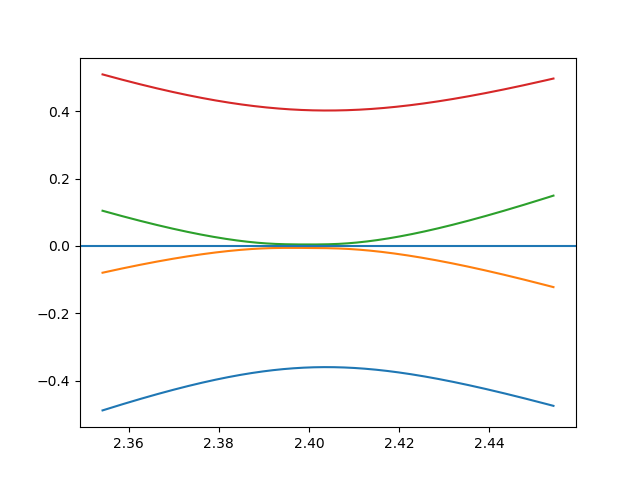

In [52]:
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(bs.K.Kxa[:,200], bs.K.E[i][:,200])
ax.axhline(0)
# ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[2])

<IPython.core.display.Javascript object>


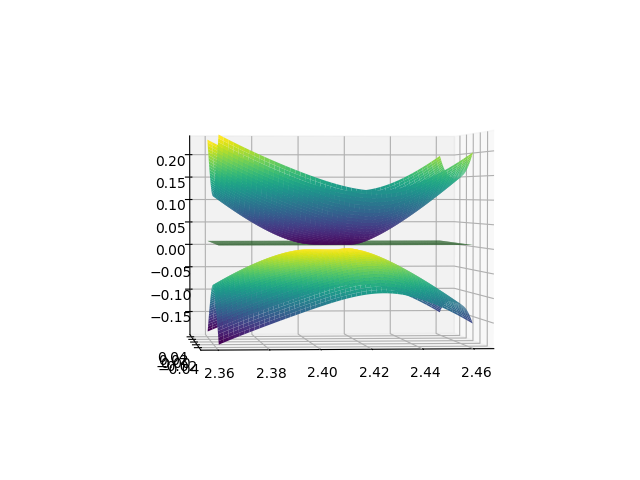

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[2], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[1], cmap='viridis')
# ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa * bs.E0)
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa * (fb.EF))

# Troubleshoot magnitudes

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [91]:
sl = StrainedLattice(eps=0.005, theta=0)

In [92]:
bs = BandStructure(sl, Delta=0.01)

In [93]:
bs.calculate(400,400)

In [94]:
H = H_4x4(bs.K._Kxa, bs.K._Kya, sl, Delta=0.01)
dHx = dH_4x4(bs.K._Kxa, bs.K._Kya, sl, xy=0)
dHy = dH_4x4(bs.K._Kxa, bs.K._Kya, sl, xy=1)

In [95]:
Hx = np.gradient(H, bs.K._kxa / a0, axis=-2)
Hy = np.gradient(H, bs.K._kya / a0, axis=-1)

In [96]:
np.allclose(Hx.imag, dHx.imag, rtol=1e-3, atol=1e-3), np.allclose(Hy.imag, dHy.imag, rtol=1e-3, atol=1e-3)

(True, True)

## Check that $\mu\approx \frac{e}{\hbar}{\Omega}E$

In [129]:
from blg_strain.utils.const import q,hbar

<IPython.core.display.Javascript object>


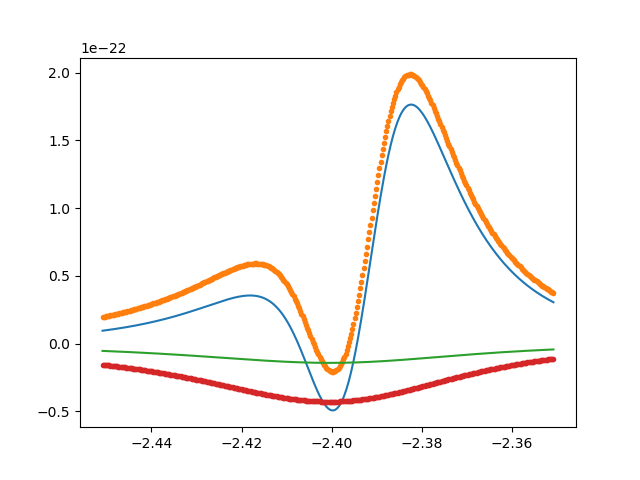

In [136]:
fig, ax = plt.subplots()
for i in [2, 3]:
    ax.plot(bs.K.Kxa[:,200], bs.K.Mu[i][:,200])
    ax.plot(bs.K.Kxa[:,200], bs.K.Omega[i][:,200] * bs.K.E[i][:,200] * q/hbar, '.')
    

# # ax.axhline(0)
# v = 200 * muB
# ax.pcolormesh(bs.K.Kxa, bs.K.Kya, -bs.K.Mu[2], cmap='bwr', vmin=-v, vmax=v)
# ax.set_aspect(1)

## CHeck magnitude of alpha/M

In [99]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

In [100]:
from blg_strain.utils.const import mu0

In [101]:
tau = 1e-12
Ex = 100
fb.alpha * tau * Ex / mu0 * 1e12

array([-1.00840128e+01,  1.03764881e-05])

In [102]:
fb.alpha * 1e-12 * 100 / mu0 * 1e12

array([-1.00840128e+01,  1.03764881e-05])

# Check signs of Omega, Mu

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [59]:
sl = StrainedLattice(eps=0.02, theta=np.pi/2)

In [60]:
bs = BandStructure(sl, Delta=0.01)

In [61]:
bs.calculate(400,400)

In [65]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

[ 8.49597364e-07 -2.23985100e-11]
[ 1.69922091e-06 -6.70039101e-14]


In [63]:
%matplotlib notebook

<IPython.core.display.Javascript object>


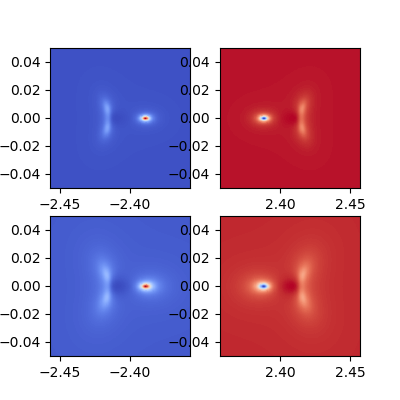

In [64]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(4,4))
ax[0][0].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[2], cmap='coolwarm')
ax[0][1].pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.Omega[2], cmap='coolwarm')

ax[1][0].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[2], cmap='coolwarm')
ax[1][1].pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.Mu[2], cmap='coolwarm')
for a in ax.flatten():
    a.set_aspect(1)

In [29]:
bs.K.Mu[2].mean(),bs.Kp.Mu[2].mean()

(4.216985719676699e-23, -4.216985754128202e-23)

<IPython.core.display.Javascript object>


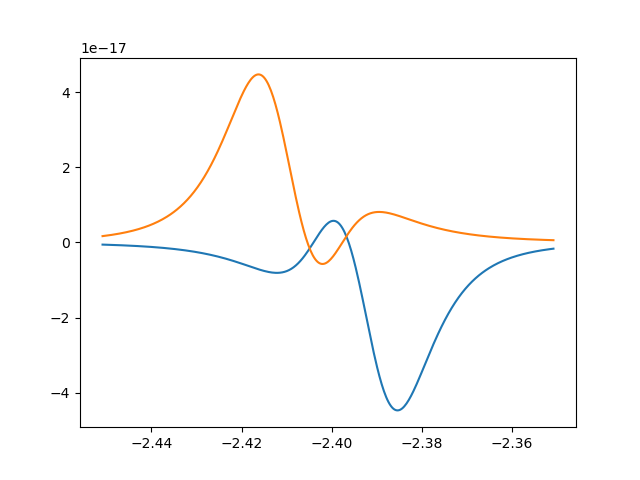

In [128]:
fig, ax = plt.subplots()
for i in [1]:
    ax.plot(bs.K.Kxa[:,200], bs.K.Omega[i][:,200])
    ax.plot(bs.K.Kxa[:,200], bs.Kp.Omega[i][:,200])

# Pybinding

In [36]:
import pybinding as pb
pb.pltutils.use_style()

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from blg_strain.lattice import strain_tensor

In [39]:
eps=0.01
theta=np.pi/5
strain = strain_tensor(eps, theta)

In [40]:
d = 0.142  # [nm] unit cell length
t = .3    # [eV] hopping energy

I = np.eye(2)

# lattice basis vectors
a1 = np.array([np.sqrt(3)/2, 3/2])
a2 = np.array([-np.sqrt(3)/2, 3/2])

# strained basis vectors
a1p = (I + strain).dot(a1)
a2p = (I + strain).dot(a2)

In [41]:
# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=a1, a2=a2)
latticep = pb.Lattice(a1=a1p, a2=a2p)

In [42]:
lattice.brillouin_zone(), latticep.brillouin_zone()

([array([-1.20919957, -2.09439516]),
  array([ 1.20919957, -2.09439516]),
  array([2.4183992, 0.       ]),
  array([1.20919957, 2.09439516]),
  array([-1.20919957,  2.09439516]),
  array([-2.4183992,  0.       ])],
 [array([-1.18629547, -2.09609276]),
  array([ 1.20930906, -2.08290023]),
  array([ 2.40836005, -0.02652674]),
  array([1.18629547, 2.09609276]),
  array([-1.20930906,  2.08290023]),
  array([-2.40836005,  0.02652674])])

In [44]:
lattice.vectors

[array([0.8660254, 1.5      , 0.       ], dtype=float32),
 array([-0.8660254,  1.5      ,  0.       ], dtype=float32)]

In [70]:
from blg_strain.lattice import StrainedLattice

In [71]:
sl = StrainedLattice(eps=eps, theta=theta)

In [73]:
sl.K_bz

array([-2.40835994,  0.02652676])

In [42]:
(16.961315-17.03098052)/17.03098052

-0.004090517273400118

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


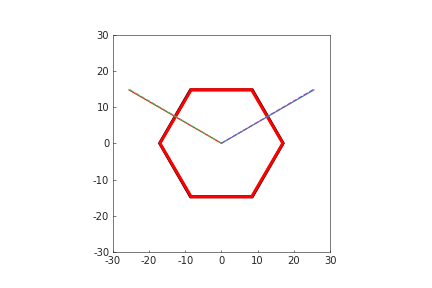

In [38]:
fig, ax = plt.subplots()

for v in lattice.reciprocal_vectors():
    ax.plot([0,v[0]], [0, v[1]])
    
for v in latticep.reciprocal_vectors():
    ax.plot([0,v[0]], [0, v[1]], '--')

from matplotlib.patches import Polygon
p = Polygon(lattice.brillouin_zone(), fill=False, color='k', lw=3)
pp = Polygon(latticep.brillouin_zone(), fill=False, color='r', lw=3)
ax.add_patch(p)
ax.add_patch(pp)
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_aspect(1)

# Realized that theta here is defined w.r.t. the zigzag axis! Earlier we had it defined w.r.t armchair.
Recheck magnitude of $\alpha$. Should be $5\times10^{-7}$ for 0.5% strain in the armchair direction ($\theta=\pi/2$) for $E_F=8.3$ meV and $\Delta$ = 10 meV. The corresponding magnetization for E=100 V/m and tau = 1 ps is 40 pA.

In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [99]:
sl = StrainedLattice(eps=0.01, theta=np.pi/2)

In [100]:
bs = BandStructure(sl, Delta=0.01)

In [101]:
bs.calculate(2000,2000)

In [102]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

[ 2.69825983e-07 -1.23060037e-11]
[5.39644514e-07 1.02733203e-15]


In [103]:
fb.alpha

array([5.39644514e-07, 1.02733203e-15])

Got $5\times10^{-7}$ but had to double strain.

In [104]:
from blg_strain.utils.const import mu0

In [105]:
tau = 1e-12
Ex = 100
fb.alpha * tau * Ex / mu0 * 1e12

array([4.29435459e+01, 8.17524851e-08])

Got 40 pA but had to double strain.

# Compare to saved calculations

In [106]:
import glob
import os

In [107]:
files = glob.glob('E:\\sBLG_data\\20200702\\*.npz')
files.sort(key=os.path.getmtime)
files[:5]

['E:\\sBLG_data\\20200702\\bs_d0.005_D-0.05.npz',
 'E:\\sBLG_data\\20200702\\versusEF_d0.005_D-0.05_T0.npz',
 'E:\\sBLG_data\\20200702\\bs_d0.005_D-0.0475.npz',
 'E:\\sBLG_data\\20200702\\versusEF_d0.005_D-0.0475_T0.npz',
 'E:\\sBLG_data\\20200702\\bs_d0.005_D-0.045000000000000005.npz']

In [120]:
bs0 = np.load(files[0], allow_pickle=True)
bs0.__dict__

{'_files': ['delta.npy',
  'Delta.npy',
  'ham.npy',
  'K.npy',
  'Kp.npy',
  'gamma4.npy',
  'dab.npy'],
 'files': ['delta', 'Delta', 'ham', 'K', 'Kp', 'gamma4', 'dab'],
 'allow_pickle': True,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='E:\\sBLG_data\\20200702\\bs_d0.005_D-0.05.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x1e30553e588>,
 'fid': <_io.BufferedReader name='E:\\sBLG_data\\20200702\\bs_d0.005_D-0.05.npz'>}

In [121]:
bs0['delta'], bs0['Delta'], bs0['K']

ModuleNotFoundError: No module named 'blg_strain.classes'

# Mucha formula

$$
\frac{\gamma'}{\gamma} = 1+\left(\frac{\delta'-\delta}{2}\frac{\mathbf{e}}{a}\cdot\mathbf{l} + \frac{\delta + \delta'}{2}\right)\eta_0 
$$

In [2]:
import numpy as np

In [4]:
from blg_strain.lattice import StrainedLattice

In [13]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [14]:
delta1 = np.array([0, 1])
delta2 = np.array([np.sqrt(3)/2, -1/2])
delta3 = np.array([-np.sqrt(3)/2, -1/2])

In [15]:
eta0 = -1
I = np.eye(2)

deltas = [delta1, delta2, delta3]
for delta in deltas:
    deltap = (I + sl.strain).dot(delta)
    print(
        np.linalg.norm(deltap-delta)/np.linalg.norm(delta)
    )

0.01649999999999996
0.08699461190211734
0.08699461190211734


In [17]:
from blg_strain.utils.const import nu

In [18]:
ell = [np.sin(2*theta), np.cos(2*theta)]
for delta in deltas:
    print(
        (-nu*eps - eps)/2 * delta.dot(ell) + (eps-nu*eps)/2
    )

-0.0165
0.07087500000000001
0.07087500000000001


## Include in module

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [4]:
sl = StrainedLattice(eps=0.005, theta=np.pi/2)

In [5]:
bs = BandStructure(sl, Delta=0.01)

In [6]:
bs.calculate(2000,2000)

In [7]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

In [8]:
fb.alpha

array([ 4.59457645e-07, -1.84858893e-15])

Got $5\times10^{-7}$. My way of calculating perturbed hopping parameters does not match Fal'ko papers.

In [36]:
from blg_strain.utils.const import mu0

In [38]:
tau = 1e-12
Ex = 100
5e-7 * tau * Ex / mu0 * 1e12

39.78873577297383

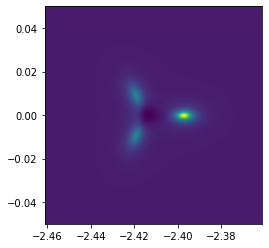

In [11]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[2])
ax.set_aspect(1)

In [33]:
sl = StrainedLattice(eps=0.02, theta=np.pi/2)
bs = BandStructure(sl, Delta=0.02)
bs.calculate(500,500)

In [34]:
from blg_strain.utils.const import muB

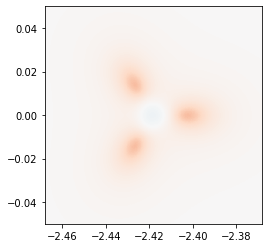

In [35]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, -bs.K.Mu[2]/muB, cmap='RdBu', vmin=-200, vmax=200)
ax.set_aspect(1)

# Yet another way to calculate hoppings

In [39]:
import numpy as np

In [40]:
from blg_strain.lattice import StrainedLattice

In [114]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [115]:
delta1 = np.array([0, 1])
delta2 = np.array([np.sqrt(3)/2, -1/2])
delta3 = np.array([-np.sqrt(3)/2, -1/2])

In [116]:
from blg_strain.utils.const import eta0, gamma0

In [117]:
eta0, gamma0

(-3, 3.161)

Modified: norm of each vector separately

In [118]:
eta0 = -1
I = np.eye(2)

deltas = [delta1, delta2, delta3]
for delta in deltas:
    deltap = (I + sl.strain).dot(delta)
    print(
        gamma0 * (1 + eta0 * (np.linalg.norm(deltap) - np.linalg.norm(delta)) / np.linalg.norm(delta))
    )

3.2131564999999997
2.9332103511175167
2.9332103511175167


In [119]:
from blg_strain.utils.const import nu

In [120]:
ell = [np.sin(2*theta), np.cos(2*theta)]
for delta in deltas:
    print(
        gamma0 * (1 + eta0 * ((eps - nu * eps) / 2 + (-nu * eps - eps) / 2 * delta.dot(ell)))
    )

3.2131564999999997
2.936964125
2.936964125


In [121]:
for delta in deltas:
    deltap = (I + sl.strain).dot(delta)
    print(gamma0 * np.exp(eta0 * (np.linalg.norm(deltap) / np.linalg.norm(delta) - 1)))

3.213589167520721
2.9412242490173908
2.9412242490173908


In [122]:
gamma0

3.161

# Try the exponential version

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [15]:
sl = StrainedLattice(eps=0.005, theta=np.pi/2)

In [16]:
bs = BandStructure(sl, Delta=0.01)

In [17]:
bs.calculate(2000,2000)

In [18]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

In [19]:
fb.alpha

array([-5.78505068e-09, -7.67943129e-16])

Got $5\times10^{-7}$ (rounding is different now). My way of calculating perturbed hopping parameters does not match Fal'ko papers.

In [13]:
from blg_strain.utils.const import mu0

In [14]:
tau = 1e-12
Ex = 100
4.445e-7 * tau * Ex / mu0 * 1e12

35.37218610217374

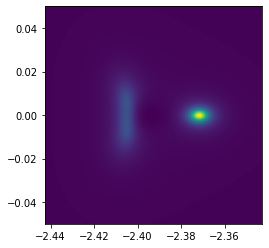

In [16]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[2])
ax.set_aspect(1)

In [62]:
sl = StrainedLattice(eps=0.02, theta=0)
bs = BandStructure(sl, Delta=0.01)
bs.calculate(500,500)

In [63]:
from blg_strain.utils.const import muB

<IPython.core.display.Javascript object>


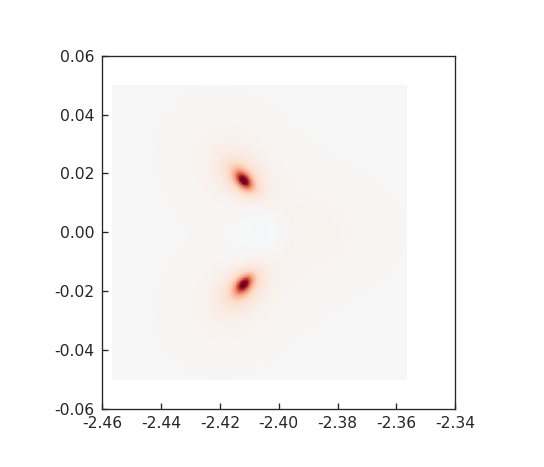

In [64]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, -bs.K.Mu[2]/muB, cmap='RdBu', vmin=-200, vmax=200)
ax.set_aspect(1)

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


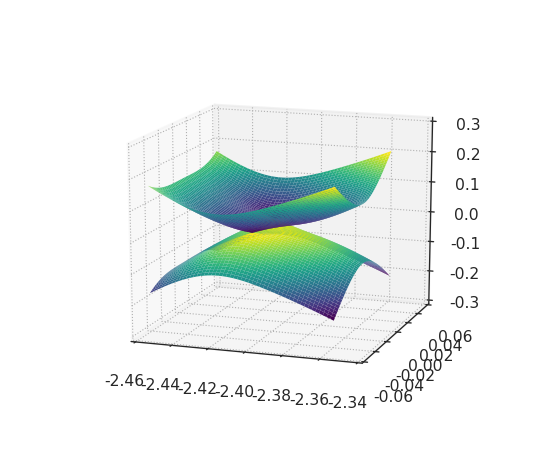

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[2], cmap='viridis')
ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.E[1], cmap='viridis')
# ax.plot_surface(bs.K.Kxa, bs.K.Kya, bs.K.Kxa/bs.K.Kxa*zero )

# Why are armchair/zigzag flipped?

## No negative sign TB model

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure

In [3]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [4]:
bs_dict = dict()

Delta = 0.01
deltas = np.array([-0.05, -0.01, 0, 0.01, 0.05])

for delta in deltas:
    sl = StrainedLattice(delta,theta)
    bs = BandStructure(sl=sl, Delta=Delta)
    
    bs.calculate(300,300)
    
    bs_dict[str(delta)] = bs

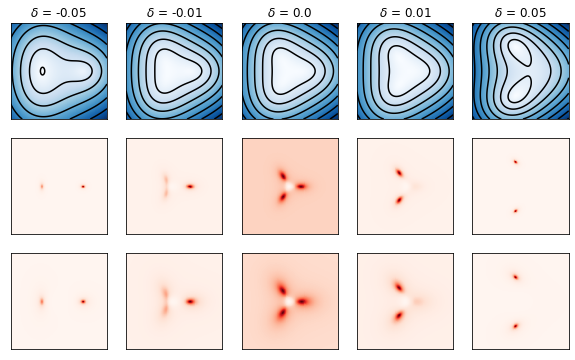

In [5]:
n=2

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, (k, bs) in enumerate(bs_dict.items()):
    ax[0,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[n], cmap='Blues')
    ax[0,i].contour(bs.K.Kxa, bs.K.Kya, bs.K.E[n], colors='k')
    
    ax[1,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[n], cmap='Reds')
#     ax[1,i].contour(bs.Kx, bs.Ky, bs.Omega[1], colors='k')
    
    ax[2,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[n], cmap='Reds')
#     ax[2,i].contour(bs.Kx, bs.Ky, bs.Mu[1], colors='k')
    
    ax[0,i].set_title(r'$\delta$ = {}'.format(deltas[i]))
    for j in range(3):
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

## Adjusted negative signs in TB model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure

In [3]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [4]:
bs_dict = dict()

Delta = 0.01
deltas = np.array([-0.05, -0.01, 0, 0.01, 0.05])

for delta in deltas:
    sl = StrainedLattice(delta,theta)
    bs = BandStructure(sl=sl, Delta=Delta)
    
    bs.calculate(300,300)
    
    bs_dict[str(delta)] = bs

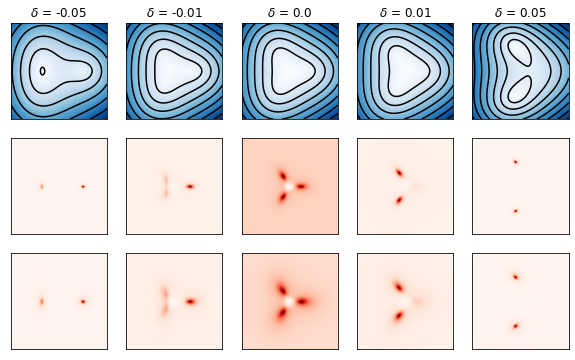

In [5]:
n=2

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, (k, bs) in enumerate(bs_dict.items()):
    ax[0,i].pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.E[n], cmap='Blues')
    ax[0,i].contour(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.E[n], colors='k')
    
    ax[1,i].pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.Omega[n], cmap='Reds')
#     ax[1,i].contour(bs.Kx, bs.Ky, bs.Omega[1], colors='k')
    
    ax[2,i].pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.Mu[n], cmap='Reds')
#     ax[2,i].contour(bs.Kx, bs.Ky, bs.Mu[1], colors='k')
    
    ax[0,i].set_title(r'$\delta$ = {}'.format(deltas[i]))
    for j in range(3):
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

Matches Moulsdale in K' valley! Note this is with negative signs on all hoppings EXCEPT $\gamma_1$. Why? Is the sign absorbed into the parameter just like $\gamma_4$?

^ That's what I thought before. Now I think Moulsdale is wrong!

# Fix all sign confusion

Use Jung and MacDonald convention (which was experimentally confirmed)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure

In [17]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [18]:
bs_dict = dict()

Delta = 0.01
deltas = np.array([-0.05, -0.01, 0, 0.01, 0.05])

for delta in deltas:
    sl = StrainedLattice(delta,theta)
    bs = BandStructure(sl=sl, Delta=Delta)
    
    bs.calculate(300,300)
    
    bs_dict[str(delta)] = bs

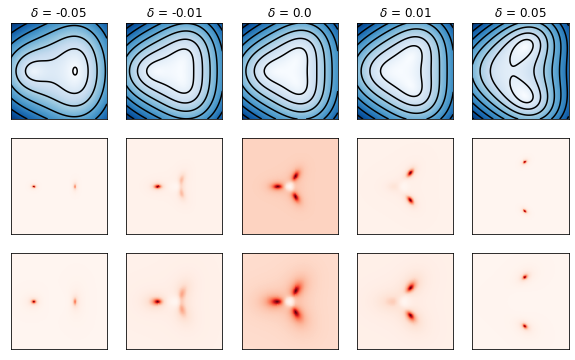

In [19]:
n=2

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, (k, bs) in enumerate(bs_dict.items()):
    ax[0,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[n], cmap='Blues')
    ax[0,i].contour(bs.K.Kxa, bs.K.Kya, bs.K.E[n], colors='k')
    
    ax[1,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[n], cmap='Reds')
#     ax[1,i].contour(bs.Kx, bs.Ky, bs.Omega[1], colors='k')
    
    ax[2,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[n], cmap='Reds')
#     ax[2,i].contour(bs.Kx, bs.Ky, bs.Mu[1], colors='k')
    
    ax[0,i].set_title(r'$\delta$ = {}'.format(deltas[i]))
    for j in range(3):
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

This matches Moulsdale, but is in the K valley and armchair/zigzag are swapped

Check magnetization:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

In [13]:
sl = StrainedLattice(eps=0.005, theta=0)

In [14]:
bs = BandStructure(sl, Delta=0.01)

In [15]:
bs.calculate(2000,2000)

In [16]:
fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

In [17]:
fb.alpha

array([7.71084362e-08, 3.58204335e-11])

Got $2\times10^{-7}$ for zigzag ($\theta=0$) and $7\times10^{-9}$ for armchair ($\theta=\pi/2$). These should be similar magnitudes...?

$7.7\times10^{-8}$ zigzag, $4\times10^{-7}$ armchair with $\gamma_4$, $\Delta_{AB}$ turned off.

In [8]:
from blg_strain.utils.const import mu0

In [9]:
tau = 1e-12
Ex = 100
5e-7 * tau * Ex / mu0 * 1e12

39.78873577297383

# Compare directly to moulsdale plots again

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure

In [3]:
eps=0.02
theta=0#np.pi/2
sl = StrainedLattice(eps,theta)

In [4]:
bs = BandStructure(sl, Delta=0.02)
bs.calculate(500,500)

In [5]:
from blg_strain.utils.const import muB

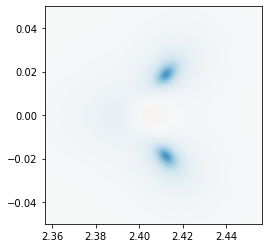

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[2], cmap='RdBu', vmin=-200*muB, vmax=200*muB)
ax.set_aspect(1)

Magnitude looks right

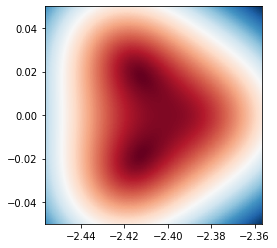

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(bs.Kp.Kxa, bs.Kp.Kya, bs.Kp.E[2], cmap='RdBu')
ax.set_aspect(1)

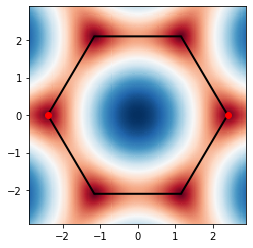

In [10]:
fig, ax = plt.subplots()
ax.pcolormesh(sl._Kxa, sl._Kya, sl._E[2], cmap='RdBu')
ax.set_aspect(1)
sl.plot_bz(ax)

# Return after a weekend

First confirm structure factors match

In [6]:
import numpy as np

In [12]:
def f(x,y):
    return np.exp(1j*y/np.sqrt(3)) + 2*np.exp(-1j * y / 2/ np.sqrt(3)) * np.cos(x/2)
def g(x,y):
    return 2*np.cos(x) + 4*np.cos(x/2) *np.cos(np.sqrt(3)/2*y)

In [14]:
x, y = 0,0
np.abs(f(x,y))**2, g(x,y)

(9.0, 6.0)

Changed gamma3 back to positive (not sure why it was negative...)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure

In [17]:
eps=0.1
theta=0
sl = StrainedLattice(eps,theta)

In [18]:
bs_dict = dict()

Delta = 0.01
deltas = np.array([-0.05, -0.01, 0, 0.01, 0.05])

for delta in deltas:
    sl = StrainedLattice(delta,theta)
    bs = BandStructure(sl=sl, Delta=Delta)
    
    bs.calculate(300,300)
    
    bs_dict[str(delta)] = bs

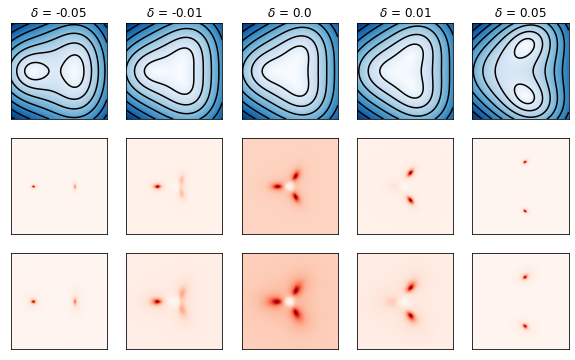

In [19]:
n=2

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10, 6))

for i, (k, bs) in enumerate(bs_dict.items()):
    ax[0,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.E[n], cmap='Blues')
    ax[0,i].contour(bs.K.Kxa, bs.K.Kya, bs.K.E[n], colors='k')
    
    ax[1,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Omega[n], cmap='Reds')
#     ax[1,i].contour(bs.Kx, bs.Ky, bs.Omega[1], colors='k')
    
    ax[2,i].pcolormesh(bs.K.Kxa, bs.K.Kya, bs.K.Mu[n], cmap='Reds')
#     ax[2,i].contour(bs.Kx, bs.Ky, bs.Mu[1], colors='k')
    
    ax[0,i].set_title(r'$\delta$ = {}'.format(deltas[i]))
    for j in range(3):
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

This matches Moulsdale, but is in the K valley and armchair/zigzag are swapped

Check magnetization ($\gamma_4$, $\Delta_{AB}$, $\gamma_n$ turned off)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from blg_strain.bands import FilledBands, BandStructure
from blg_strain.lattice import StrainedLattice
from blg_strain.hamiltonian import H_4x4, dH_4x4
from blg_strain.utils.const import a0

Zigzag:

In [41]:
sl = StrainedLattice(eps=0.005, theta=0)

bs = BandStructure(sl, Delta=0.01)

bs.calculate(2000,2000)

fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

fb.alpha 

array([1.55101066e-07, 3.58821767e-11])

Armchair:

In [42]:
sl = StrainedLattice(eps=0.005, theta=np.pi/2)

bs = BandStructure(sl, Delta=0.01)

bs.calculate(2000,2000)

fb = FilledBands(bs, EF=0.00833333, T=0)
fb.calculate()

fb.alpha 

array([-5.31280942e-07,  2.09468672e-16])

## Why do armchair and zigzag have opposite signs? This doesn't seem right. ($\gamma_4$, $\Delta_{AB}$, $\gamma_n$ still off)
See opposite signs for $\varepsilon=0.005$ but same sign for $\varepsilon=0.01$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands

In [7]:
from blg_strain.utils.const import q, hbar

In [85]:
eps=0.005
slzz = StrainedLattice(eps, 0)
slac = StrainedLattice(eps, np.pi/2)

In [86]:
bszz = BandStructure(slzz, Delta=0.01)
bsac = BandStructure(slac, Delta=0.01)

bszz.calculate(500, 500)
bsac.calculate(500, 500)

Text(0.5, 0.98, 'magnetic moment, row 1 K, row 2 Kp, col 1 zz, col 2 ac')

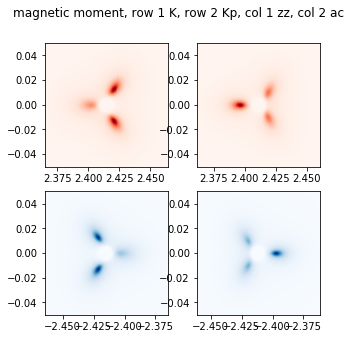

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
Zzz = bszz.K.Mu[2]
Zac = bsac.K.Mu[2]

Zzzp = bszz.Kp.Mu[2]
Zacp = bsac.Kp.Mu[2]

ax[0, 0].pcolormesh(bszz.K.Kxa, bszz.K.Kya, Zzz, cmap='Reds', vmin=0)
ax[0, 1].pcolormesh(bsac.K.Kxa, bsac.K.Kya, Zac, cmap='Reds', vmin=0)

ax[1, 0].pcolormesh(bszz.Kp.Kxa, bszz.Kp.Kya, Zzzp, cmap='Blues_r', vmax=0)
ax[1, 1].pcolormesh(bsac.Kp.Kxa, bsac.Kp.Kya, Zacp, cmap='Blues_r', vmax=0)


for a in ax.flatten():
    a.set_aspect(1)
    
fig.suptitle('magnetic moment, row 1 K, row 2 Kp, col 1 zz, col 2 ac')

In [88]:
bszz.K.E[2].min(), bszz.K.E[1].max(), bszz.Kp.E[2].min(), bszz.Kp.E[1].max()

(0.0047693133607846026,
 -0.004769313360784613,
 0.004769313264123668,
 -0.004769313264123658)

In [89]:
bsac.K.E[2].min(), bsac.K.E[1].max(), bsac.Kp.E[2].min(), bsac.Kp.E[1].max()

(0.004717478980036901,
 -0.004717478980036908,
 0.004717479049775002,
 -0.004717479049774995)

In [90]:
EF = 0.00833333
fbzz = FilledBands(bszz, EF=EF, T=0)
fbzz.calculate()

fbac = FilledBands(bsac, EF=EF, T=0)
fbac.calculate()

Text(0.5, 0.98, 'integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')

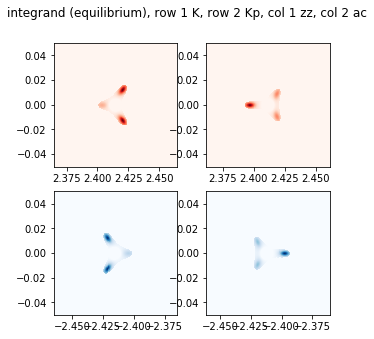

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
Zzz = fbzz.feq_K[2] * (bszz.K.Mu[2] + q * bszz.K.Omega[2] / hbar * (EF-bszz.K.E[2]))
Zac = fbac.feq_K[2] * (bsac.K.Mu[2] + q * bsac.K.Omega[2] / hbar * (EF-bsac.K.E[2]))

Zzzp = fbzz.feq_Kp[2] * (bszz.Kp.Mu[2] + q * bszz.Kp.Omega[2] / hbar * (EF-bszz.Kp.E[2]))
Zacp = fbac.feq_Kp[2] * (bsac.Kp.Mu[2] + q * bsac.Kp.Omega[2] / hbar * (EF-bsac.Kp.E[2]))

ax[0, 0].pcolormesh(bszz.K.Kxa, bszz.K.Kya, Zzz, cmap='Reds', vmin=0)
ax[0, 1].pcolormesh(bsac.K.Kxa, bsac.K.Kya, Zac, cmap='Reds', vmin=0)

ax[1, 0].pcolormesh(bszz.Kp.Kxa, bszz.Kp.Kya, Zzzp, cmap='Blues_r', vmax=0)
ax[1, 1].pcolormesh(bsac.Kp.Kxa, bsac.Kp.Kya, Zacp, cmap='Blues_r', vmax=0)


for a in ax.flatten():
    a.set_aspect(1)
    
fig.suptitle('integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')

In [93]:
fbzz.alpha, fbac.alpha

(array([1.57530387e-07, 6.48392961e-16]),
 array([-4.8442778e-07,  2.0835742e-16]))

## 0.005

In [110]:
eps=0.005
slzz = StrainedLattice(eps, 0)
slac = StrainedLattice(eps, np.pi/2)

In [111]:
bszz = BandStructure(slzz, Delta=0.01)
bsac = BandStructure(slac, Delta=0.01)

bszz.calculate(500, 500)
bsac.calculate(500, 500)

In [112]:
alphaszz = []
alphasac = []
EFs = np.linspace(0,0.02, 30)
for EF in EFs:
    fbzz = FilledBands(bszz, EF=EF, T=0)
    fbzz.calculate()
    alphaszz.append(fbzz.alpha[0])
    fbac = FilledBands(bsac, EF=EF, T=0)
    fbac.calculate()
    alphasac.append(fbac.alpha[0])
    

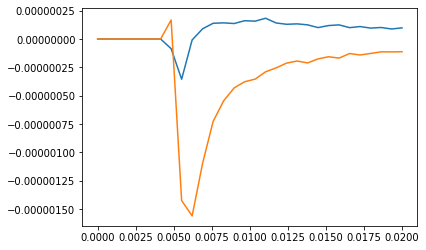

In [113]:
fig, ax = plt.subplots()
ax.plot(EFs, alphaszz)
ax.plot(EFs, alphasac)

## 0.01

In [3]:
eps=0.01
slzz = StrainedLattice(eps, 0)
slac = StrainedLattice(eps, np.pi/2)

In [4]:
bszz = BandStructure(slzz, Delta=0.01)
bsac = BandStructure(slac, Delta=0.01)

bszz.calculate(500, 500)
bsac.calculate(500, 500)

In [116]:
alphaszz = []
alphasac = []
EFs = np.linspace(0,0.02, 30)
for EF in EFs:
    fbzz = FilledBands(bszz, EF=EF, T=0)
    fbzz.calculate()
    alphaszz.append(fbzz.alpha[0])
    fbac = FilledBands(bsac, EF=EF, T=0)
    fbac.calculate()
    alphasac.append(fbac.alpha[0])
    

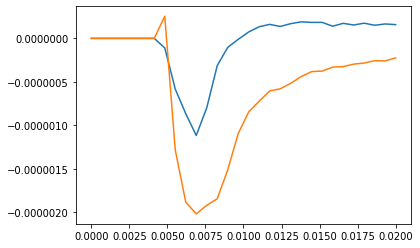

In [117]:
fig, ax = plt.subplots()
ax.plot(EFs, alphaszz)
ax.plot(EFs, alphasac)

## Can we visualize the difference between positive and negative magnetization?

In [5]:
EF = 0.0075
fbzz = FilledBands(bszz, EF=EF, T=0)
fbzz.calculate()

fbac = FilledBands(bsac, EF=EF, T=0)
fbac.calculate()

Text(0.5, 0.98, 'integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')

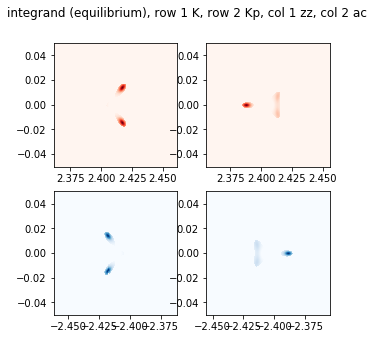

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
Zzz = fbzz.feq_K[2] * (bszz.K.Mu[2] + q * bszz.K.Omega[2] / hbar * (EF-bszz.K.E[2]))
Zac = fbac.feq_K[2] * (bsac.K.Mu[2] + q * bsac.K.Omega[2] / hbar * (EF-bsac.K.E[2]))

Zzzp = fbzz.feq_Kp[2] * (bszz.Kp.Mu[2] + q * bszz.Kp.Omega[2] / hbar * (EF-bszz.Kp.E[2]))
Zacp = fbac.feq_Kp[2] * (bsac.Kp.Mu[2] + q * bsac.Kp.Omega[2] / hbar * (EF-bsac.Kp.E[2]))

ax[0, 0].pcolormesh(bszz.K.Kxa, bszz.K.Kya, Zzz, cmap='Reds', vmin=0)
ax[0, 1].pcolormesh(bsac.K.Kxa, bsac.K.Kya, Zac, cmap='Reds', vmin=0)

ax[1, 0].pcolormesh(bszz.Kp.Kxa, bszz.Kp.Kya, Zzzp, cmap='Blues_r', vmax=0)
ax[1, 1].pcolormesh(bsac.Kp.Kxa, bsac.Kp.Kya, Zacp, cmap='Blues_r', vmax=0)


for a in ax.flatten():
    a.set_aspect(1)
    
fig.suptitle('integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')

In [12]:
fbzz.alpha, fbzz.alpha_K, fbzz.alpha_Kp

(array([ 1.70450356e-07, -3.56734699e-16]),
 array([ 8.52294148e-08, -8.00711722e-12]),
 array([8.52209412e-08, 8.00676048e-12]))

In [13]:
fbac.alpha, fbac.alpha_K, fbac.alpha_Kp

(array([-5.10857101e-07, -2.45037895e-14]),
 array([-2.55437281e-07, -1.01672121e-11]),
 array([-2.55419820e-07,  1.01427083e-11]))

In [10]:
EF = 0.0125
fbzz = FilledBands(bszz, EF=EF, T=0)
fbzz.calculate()

fbac = FilledBands(bsac, EF=EF, T=0)
fbac.calculate()

Text(0.5, 0.98, 'integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')

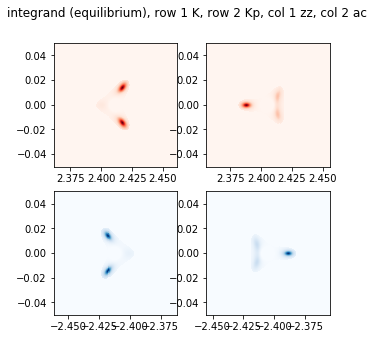

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(5,5))
Zzz = fbzz.feq_K[2] * (bszz.K.Mu[2] + q * bszz.K.Omega[2] / hbar * (EF-bszz.K.E[2]))
Zac = fbac.feq_K[2] * (bsac.K.Mu[2] + q * bsac.K.Omega[2] / hbar * (EF-bsac.K.E[2]))

Zzzp = fbzz.feq_Kp[2] * (bszz.Kp.Mu[2] + q * bszz.Kp.Omega[2] / hbar * (EF-bszz.Kp.E[2]))
Zacp = fbac.feq_Kp[2] * (bsac.Kp.Mu[2] + q * bsac.Kp.Omega[2] / hbar * (EF-bsac.Kp.E[2]))

ax[0, 0].pcolormesh(bszz.K.Kxa, bszz.K.Kya, Zzz, cmap='Reds', vmin=0)
ax[0, 1].pcolormesh(bsac.K.Kxa, bsac.K.Kya, Zac, cmap='Reds', vmin=0)

ax[1, 0].pcolormesh(bszz.Kp.Kxa, bszz.Kp.Kya, Zzzp, cmap='Blues_r', vmax=0)
ax[1, 1].pcolormesh(bsac.Kp.Kxa, bsac.Kp.Kya, Zacp, cmap='Blues_r', vmax=0)


for a in ax.flatten():
    a.set_aspect(1)
    
fig.suptitle('integrand (equilibrium), row 1 K, row 2 Kp, col 1 zz, col 2 ac')